In [ ]:
import warnings
from synthcity.plugins import Plugins
from synthcity.utils.datasets.time_series.google_stocks import GoogleStocksDataloader
from synthcity.plugins.core.dataloader import TimeSeriesDataLoader

warnings.filterwarnings("ignore")


eval_plugin = "autoregressive"

In [2]:
# Load data
static_data, temporal_data, outcome = GoogleStocksDataloader(seq_len=4).load()
loader = TimeSeriesDataLoader(
    temporal_data=temporal_data, static_data=static_data, outcome=outcome,
)

loader.dataframe()

,temporal_open_t0,temporal_open_t1,temporal_open_t2,temporal_open_t3,temporal_high_t0,temporal_high_t1,temporal_high_t2,temporal_high_t3,temporal_low_t0,temporal_low_t1,...,temporal_close_t3,temporal_volume_t0,temporal_volume_t1,temporal_volume_t2,temporal_volume_t3,temporal_adj_close_t0,temporal_adj_close_t1,temporal_adj_close_t2,temporal_adj_close_t3,out_open_next
0,0.410366,0.334177,0.375992,0.396731,0.385739,0.335194,0.372539,0.366370,0.360217,0.376783,...,0.342424,0.147704,0.070442,0.054026,0.103396,0.315262,0.357136,0.382377,0.342424,0.147661
1,0.572671,0.569545,0.601197,0.656926,0.582429,0.563909,0.669142,0.658093,0.619947,0.583568,...,0.644917,0.053134,0.071298,0.058873,0.071750,0.550300,0.583654,0.634871,0.644917,0.097320
2,0.330682,0.392843,0.445783,0.529254,0.354438,0.406953,0.492874,0.503617,0.357423,0.427048,...,0.425260,0.070809,0.046833,0.118644,0.129547,0.373297,0.430519,0.506725,0.425260,0.149420
3,0.231166,0.280554,0.337752,0.381246,0.262789,0.291565,0.335635,0.339620,0.267168,0.318989,...,0.260180,0.140144,0.046393,0.037910,0.216044,0.266965,0.318435,0.359035,0.260180,0.110283
4,0.139459,0.079438,0.000000,0.024560,0.099030,0.048519,0.000000,0.025844,0.070556,0.000000,...,0.050031,0.465415,0.432705,0.238076,0.266171,0.072901,0.000000,0.016128,0.050031,0.105667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.318951,0.268700,0.217082,0.177710,0.303769,0.230277,0.203482,0.190181,0.310803,0.241507,...,0.210676,0.135836,0.174204,0.092431,0.124071,0.255525,0.211532,0.166870,0.210676,0.636042
89,0.223300,0.200914,0.245731,0.174775,0.184407,0.207727,0.199814,0.154522,0.232810,0.242767,...,0.181373,0.204047,0.334132,0.308378,0.253636,0.183920,0.228956,0.171810,0.181373,0.665050
90,0.309595,0.347107,0.356082,0.370972,0.314138,0.354846,0.341510,0.327971,0.357775,0.395415,...,0.322563,0.037867,0.107991,0.058139,0.081314,0.330479,0.337494,0.351811,0.322563,0.834838
91,0.681576,0.636042,0.665050,0.834838,0.656814,0.652603,0.806027,0.836003,0.679285,0.688811,...,0.841683,0.014319,0.022601,0.067221,0.000000,0.608171,0.640021,0.809833,0.841683,0.870378


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(loader)

In [4]:
# Generate new samples

syn_model.generate(count=10).dataframe()

,temporal_open_t0,temporal_open_t1,temporal_open_t2,temporal_open_t3,temporal_high_t0,temporal_high_t1,temporal_high_t2,temporal_high_t3,temporal_low_t0,temporal_low_t1,...,temporal_close_t3,temporal_volume_t0,temporal_volume_t1,temporal_volume_t2,temporal_volume_t3,temporal_adj_close_t0,temporal_adj_close_t1,temporal_adj_close_t2,temporal_adj_close_t3,out_open_next
0,0.223456,0.171481,0.121049,0.119369,0.246305,0.161566,0.119747,0.111293,0.254153,0.165276,...,0.101587,0.266718,0.382267,0.406346,0.259131,0.113417,0.167543,0.102360,0.095366,0.285121
1,0.121503,0.172943,0.105122,0.165381,0.357875,0.162588,0.108153,0.140508,0.263703,0.166945,...,0.167771,0.199549,0.381717,0.410724,0.261104,0.285088,0.169034,0.089344,0.150706,0.283462
2,0.504614,0.243202,0.165401,0.106784,0.331030,0.213514,0.162842,0.122102,0.666452,0.236818,...,0.115900,0.137107,0.351473,0.386329,0.416222,0.541701,0.234610,0.162936,0.107739,0.280350
3,0.484852,0.294654,0.686437,0.727360,0.312203,0.313004,0.731088,0.714329,0.425525,0.583872,...,0.699603,0.022779,0.095758,0.079759,0.043887,0.061973,0.531579,0.611710,0.645173,0.266523
4,0.315563,0.180269,0.134810,0.123611,0.111815,0.170317,0.135181,0.122616,0.160513,0.175279,...,0.112801,0.369550,0.380189,0.401454,0.425913,0.104623,0.176782,0.121516,0.106364,0.285244
5,0.455982,0.192129,0.177702,0.204396,0.322995,0.180394,0.164367,0.189195,0.150377,0.188288,...,0.203895,0.075126,0.377895,0.246955,0.246345,0.430519,0.186572,0.163541,0.188577,0.280914
6,0.504614,0.196232,0.142735,0.158034,0.102064,0.188314,0.149819,0.183241,0.540638,0.197445,...,0.189156,0.329052,0.372703,0.401425,0.270011,0.395012,0.198687,0.145899,0.189453,0.282053
7,0.305556,0.200793,0.153265,0.097284,0.503617,0.184784,0.147866,0.093784,0.174408,0.198938,...,0.083775,0.363110,0.372398,0.389172,0.404715,0.059768,0.198055,0.148113,0.073608,0.284105
8,0.462123,0.172026,0.134196,0.184584,0.413779,0.164073,0.131366,0.169133,0.389350,0.165776,...,0.169667,0.153999,0.383183,0.409732,0.270599,0.036715,0.168132,0.118084,0.169841,0.283032
9,0.502825,0.171401,0.107213,0.143338,0.425170,0.161242,0.113009,0.130349,0.346727,0.165237,...,0.121355,0.471534,0.382109,0.408561,0.272534,0.067488,0.167525,0.096607,0.116508,0.283748


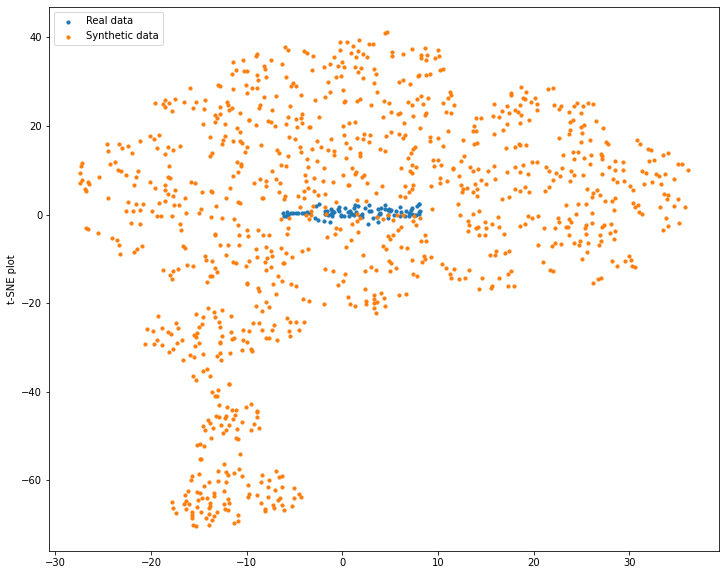

In [5]:
# plot

import matplotlib.pyplot as plt

syn_model.plot(plt, loader, count=1000, plots=["tsne"])

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate([eval_plugin], loader, task_type="time_series", repeats=2,)

In [7]:
Benchmarks.print(score)


Plugin : autoregressive


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch.score,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.0
sanity.common_rows_proportion.score,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.01
sanity.nearest_syn_neighbor_distance.mean,0.223841,0.280989,0.252415,0.028574,0.252415,0.028574,2,0,0.0
sanity.close_values_probability.score,0.405405,0.743243,0.574324,0.168919,0.574324,0.168919,2,0,0.0
sanity.distant_values_probability.score,0.027027,0.054054,0.040541,0.013514,0.040541,0.013514,2,0,0.0
stats.jensenshannon_dist.marginal,0.364596,0.365742,0.365169,0.000573,0.365169,0.000573,2,0,0.15
stats.chi_squared_test.marginal,0.0,0.04,0.02,0.02,0.02,0.02,2,0,0.02
stats.feature_corr.joint,10.225784,10.31985,10.272817,0.047033,10.272817,0.047033,2,0,0.18
stats.inv_kl_divergence.marginal,0.252485,0.252846,0.252665,0.00018,0.252665,0.00018,2,0,0.01
stats.ks_test.marginal,0.635135,0.641622,0.638378,0.003243,0.638378,0.003243,2,0,0.01
